In [9]:
#!/usr/bin/env/python2.7
"""
from

https://github.com/dhhagan/py-openaq/blob/master/docs/tutorial/delhi.ipynb

and

https://github.com/dhhagan/py-openaq/blob/master/docs/tutorial/api.ipynb
"""

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openaq
import warnings

In [10]:
warnings.simplefilter('ignore')

%matplotlib inline

# Set major seaborn asthetics
sns.set("notebook", style='ticks', font_scale=1.0)

# Increase the quality of inline plots
mpl.rcParams['figure.dpi']= 100

api = openaq.OpenAQ()

locations = api.locations(city='Chiang Mai', df=True)

# locations.location

params = []

for i, r in locations.iterrows():
    [params.append(x) for x in r.parameters if x not in params]

#params

In [11]:
locations

,city,coordinates,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Chiang Mai,NaN,66391,TH,2015-10-22 01:00:00,2018-04-11 01:00:00,"Chang Phueak, Mueang","[co, so2, pm10, o3, no2]",Thailand,[Thailand]
1,Chiang Mai,"{u'latitude': 18.791092, u'longitude': 98.98866}",67214,TH,2015-10-24 14:00:00,2018-04-11 01:00:00,"Si Phum, Mueang","[co, no2, o3, pm10, so2]",Thailand,[Thailand]


In [12]:
meas_cpm = api.measurements(country='TH',city='Chiang Mai', location='Chang Phueak, Mueang', df=True)

In [ ]:
# Which params do we have?
df = pd.DataFrame()

for u in meas_cpm.parameter.unique():
    _df = meas_cpm[meas_cpm['parameter'] == u][['value']]
    _df.columns = [u]

    # Merge the dataframes together
    df = pd.merge(df, _df, left_index=True, right_index=True, how='outer')

# Get rid of rows where not all exist
df.dropna(how='any', inplace=True)

g = sns.PairGrid(df, diag_sharey=False)

g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

#plt.show()

In [13]:
meas_spm = api.measurements(country='TH',city='Chiang Mai', location='Si Phum, Mueang', df=True)

In [14]:
# Which params do we have?
df = pd.DataFrame()

for u in meas_spm.parameter.unique():
    _df = meas_spm[meas_spm['parameter'] == u][['value']]
    _df.columns = [u]

    # Merge the dataframes together
    df = pd.merge(df, _df, left_index=True, right_index=True, how='outer')

# Get rid of rows where not all exist
df.dropna(how='any', inplace=True)

In [ ]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

plt.show()

In [15]:
meas_spm_no2 = api.measurements(country='TH',city='Chiang Mai', location='Chang Phueak, Mueang', df=True, parameter='no2')

In [16]:
# do the data only span a very short range??
meas_spm_no2.head()

,city,country,date.utc,location,parameter,unit,value
date.local,,,,,,,
2018-04-11 08:00:00,Chiang Mai,TH,2018-04-11 01:00:00,"Chang Phueak, Mueang",no2,ppm,0.000
2018-04-11 07:00:00,Chiang Mai,TH,2018-04-11 00:00:00,"Chang Phueak, Mueang",no2,ppm,0.000
2018-04-11 06:00:00,Chiang Mai,TH,2018-04-10 23:00:00,"Chang Phueak, Mueang",no2,ppm,0.000
2018-04-11 05:00:00,Chiang Mai,TH,2018-04-10 22:00:00,"Chang Phueak, Mueang",no2,ppm,0.001
2018-04-11 04:00:00,Chiang Mai,TH,2018-04-10 21:00:00,"Chang Phueak, Mueang",no2,ppm,0.000


In [17]:
meas_spm_no2.tail()

,city,country,date.utc,location,parameter,unit,value
date.local,,,,,,,
2018-04-07 06:00:00,Chiang Mai,TH,2018-04-06 23:00:00,"Chang Phueak, Mueang",no2,ppm,0.000
2018-04-07 05:00:00,Chiang Mai,TH,2018-04-06 22:00:00,"Chang Phueak, Mueang",no2,ppm,0.000
2018-04-07 02:00:00,Chiang Mai,TH,2018-04-06 19:00:00,"Chang Phueak, Mueang",no2,ppm,0.001
2018-04-07 01:00:00,Chiang Mai,TH,2018-04-06 18:00:00,"Chang Phueak, Mueang",no2,ppm,0.007
2018-04-07 00:00:00,Chiang Mai,TH,2018-04-06 17:00:00,"Chang Phueak, Mueang",no2,ppm,0.005


(736791.0, 736795.0)

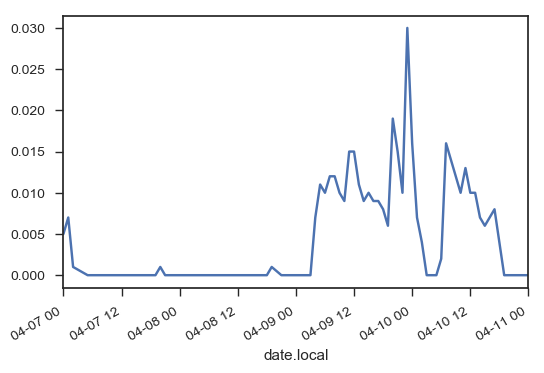

In [21]:
#plt.subplot(1,2,2)
ax = meas_spm_no2['value'].plot()
ax.set_xlim(pd.Timestamp('2018-04-07 00:00'), pd.Timestamp('2018-04-11'))
#plt.ylabel('NO2 mass mixing ratio / ppm')
#ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
#                                                interval=2))